In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json("/content/chatbot.json")

In [3]:
df.head()

,intents
0,"{'tag': 'greeting', 'patterns': ['Hello', 'Hi ..."
1,"{'tag': 'goodbye', 'patterns': ['Goodbye', 'By..."
2,"{'tag': 'name', 'patterns': ['What's your name..."


In [4]:
data_dict = {
      "tag" : [],
      "patterns" : [],
      "responses" : []
  }
def createDataframe():
  for index, data in df.iterrows():
    dic = data.to_dict()
    # print(index,dic["intents"])
    new_dic = dic["intents"]
    for key, data in new_dic.items():
      if key != "context_set":
        data_dict[key].append(data)


In [5]:
createDataframe()

In [6]:
df1 = pd.DataFrame(data_dict, columns=["tag", "patterns" ,"responses"])

In [7]:
df1.shape

(3, 3)

In [8]:
df1.head()

,tag,patterns,responses
0,greeting,"[Hello, Hi there, Hey, Greetings, Good morning...","[Hey!, Hi!, Hello there!, Good morning to you ..."
1,goodbye,"[Goodbye, Bye, See you later, Take care, Farew...","[Goodbye!, Bye!, See you later!, Take care!, F..."
2,name,"[What's your name?, May I ask your name?, Coul...","[My name is Nezuko., You can call me Nezuko., ..."


In [9]:
df2 = df1.drop(columns=["responses"])

In [10]:
df2

,tag,patterns
0,greeting,"[Hello, Hi there, Hey, Greetings, Good morning..."
1,goodbye,"[Goodbye, Bye, See you later, Take care, Farew..."
2,name,"[What's your name?, May I ask your name?, Coul..."


In [11]:
final_dict = {
    "tag" :[],
    "patterns" : []
}
for index, value in df2.iterrows():
  tag = value[0]
  patterns = value[1]

  for i in patterns:
    final_dict["tag"].append(tag)
    final_dict["patterns"].append(i)



In [12]:
df3 = pd.DataFrame(final_dict, columns=["tag" ,"patterns"])

In [13]:
df3

,tag,patterns
0,greeting,Hello
1,greeting,Hi there
2,greeting,Hey
3,greeting,Greetings
4,greeting,Good morning
...,...,...
167,name,"May I know your name, please?"
168,name,Hi! Can I get your name?
169,name,"Before we continue, would you mind sharing you..."
170,name,"Hey, I'm interested to know your name. Can you..."


In [14]:
import nltk
nltk.download("punkt")
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [15]:
## Data Preprocessing
## 1. convert to lowercase
## 2. remove stop words and special characters
## 3. stemming(conversion of similar words to their root words : dance, dancing , danced == dance)

In [16]:
from nltk.corpus import stopwords
nltk.download("stopwords")
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [18]:
## function for data preprocessing of the comment_text column
def preprocessing(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = list(y)
  y.clear()

  # for i in text:
  #   if i not in stopwords.words("english"):
  #     y.append(i)

  # text = list(y)
  # y.clear()

  for i in text:
    if i not in string.punctuation:
      y.append(i)

  text = list(y)
  y.clear()

  for i in text:
    y.append(ps.stem(i))


  return " ".join(y)


In [19]:
import sys
sys.setrecursionlimit(10**6)


In [20]:
df3["patterns"] = df3["patterns"].apply(preprocessing)

In [21]:
df3

,tag,patterns
0,greeting,hello
1,greeting,hi there
2,greeting,hey
3,greeting,greet
4,greeting,good morn
...,...,...
167,name,may i know your name pleas
168,name,hi can i get your name
169,name,befor we continu would you mind share your name
170,name,hey i interest to know your name can you tell me


In [22]:
from wordcloud import WordCloud

In [23]:
# whole_text = (new_df[new_df["toxic"] == 1]["transformed_text"]).to_list()
# text_data = " ".join(whole_text)

In [24]:
# # Split the text into words (assuming space-separated words)
# word_list = text_data.split()

# # Create a WordCloud object
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# # Display the generated word cloud using matplotlib
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')  # Turn off axis labels
# plt.show()

In [25]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features=100) #1000

In [26]:
le = LabelEncoder()

In [27]:
y = le.fit_transform(df3["tag"])

In [28]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

In [29]:
X = tfid.fit_transform(df3["patterns"]).toarray()


In [30]:
# query = X[0].reshape(1, -1)
# query.shape

In [31]:
X.shape

(172, 100)

In [32]:
y.shape

(172,)

In [33]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [36]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score
gb = GaussianNB()
bb = BernoulliNB()
mb = MultinomialNB()

In [37]:
mb.fit(X_train, y_train)

MultinomialNB()

In [38]:
y_pred = mb.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(y_test, y_pred)

0.9142857142857143

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [42]:
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='saga', penalty='l2')
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=200, random_state=42)
xgb = XGBClassifier(n_estimators=200,random_state=42)

In [43]:
clfs = {
     'SVC' : svc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'xgb':xgb
}

In [44]:
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred)

0.9142857142857143

In [45]:
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
accuracy_score(y_test, y_pred)

0.8857142857142857

In [46]:
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy_score(y_test, y_pred)

0.9428571428571428

In [47]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [48]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.25432892],
       [0.        , 0.        , 0.        , ..., 0.        , 0.3150837 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.29453646]])

In [49]:
model = Sequential()

model.add(Dense(32, activation="relu", input_dim=100))
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))

model.add(Dense(38, activation="softmax"))

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                3232      
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 38)                4902      
                                                                 
Total params: 18566 (72.52 KB)
Trainable params: 18566 (72.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [52]:
history = model.fit(X_train, y_train, epochs=200, validation_split=0.2 )

Epoch 1/200
4/4 [==============================] - 4s 355ms/step - loss: 3.6023 - accuracy: 0.1560 - val_loss: 3.5539 - val_accuracy: 0.5357
Epoch 2/200
4/4 [==============================] - 0s 39ms/step - loss: 3.5259 - accuracy: 0.4037 - val_loss: 3.4739 - val_accuracy: 0.5357
Epoch 3/200
4/4 [==============================] - 0s 37ms/step - loss: 3.4355 - accuracy: 0.4495 - val_loss: 3.3704 - val_accuracy: 0.5357
Epoch 4/200
4/4 [==============================] - 0s 81ms/step - loss: 3.3182 - accuracy: 0.4679 - val_loss: 3.2329 - val_accuracy: 0.5000
Epoch 5/200
4/4 [==============================] - 0s 33ms/step - loss: 3.1593 - accuracy: 0.4679 - val_loss: 3.0450 - val_accuracy: 0.5000
Epoch 6/200
4/4 [==============================] - 0s 48ms/step - loss: 2.9421 - accuracy: 0.4495 - val_loss: 2.7907 - val_accuracy: 0.4286
Epoch 7/200
4/4 [==============================] - 0s 24ms/step - loss: 2.6435 - accuracy: 0.4128 - val_loss: 2.4571 - val_accuracy: 0.4286
Epoch 8/200
4/4 [==

In [53]:
import matplotlib.pyplot as plt

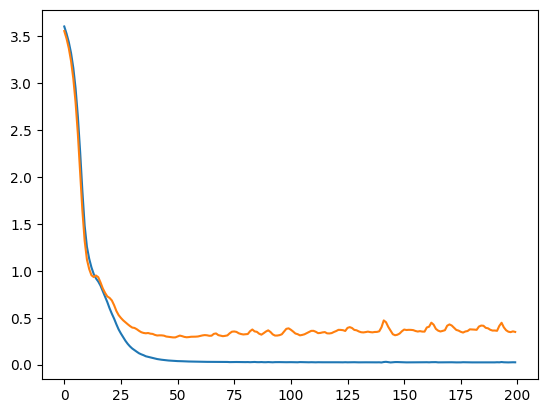

In [54]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

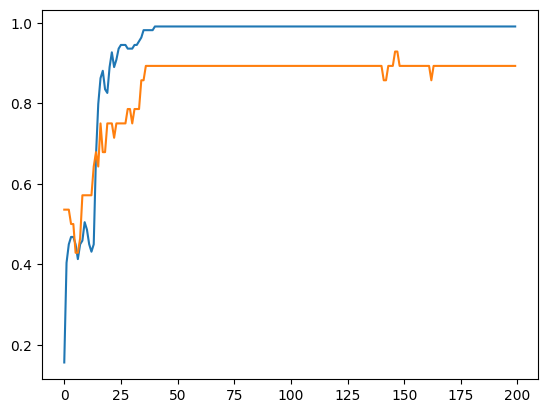

In [55]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [56]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [57]:
test = tfid.transform(["your name"])

In [58]:
test.A

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.71385778, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [59]:
arr = model.predict(test.A)

1/1 [==============================] - 0s 20ms/step


In [60]:
arr

array([[4.1274005e-04, 1.2117414e-05, 9.9957246e-01, 5.2814418e-08,
        1.0687361e-07, 2.6226646e-08, 2.9232053e-08, 2.0381580e-07,
        5.6342607e-08, 1.1954903e-07, 3.1585270e-08, 1.3602268e-07,
        1.3873657e-07, 2.6319352e-08, 1.1533156e-07, 2.4930022e-08,
        1.7806435e-07, 1.0437379e-07, 1.0084102e-07, 1.8666998e-07,
        1.2405077e-07, 4.6169877e-08, 3.9787189e-08, 2.9026139e-09,
        8.7815089e-09, 9.2077407e-08, 6.8459144e-08, 2.7319501e-08,
        6.0541183e-08, 1.2921492e-08, 9.2532517e-08, 2.7421052e-07,
        6.0880573e-08, 1.9769177e-08, 4.1049049e-09, 9.0859672e-08,
        2.6056371e-08, 6.4225851e-08]], dtype=float32)

In [61]:
arr = arr.reshape(38)

In [62]:
arr

array([4.1274005e-04, 1.2117414e-05, 9.9957246e-01, 5.2814418e-08,
       1.0687361e-07, 2.6226646e-08, 2.9232053e-08, 2.0381580e-07,
       5.6342607e-08, 1.1954903e-07, 3.1585270e-08, 1.3602268e-07,
       1.3873657e-07, 2.6319352e-08, 1.1533156e-07, 2.4930022e-08,
       1.7806435e-07, 1.0437379e-07, 1.0084102e-07, 1.8666998e-07,
       1.2405077e-07, 4.6169877e-08, 3.9787189e-08, 2.9026139e-09,
       8.7815089e-09, 9.2077407e-08, 6.8459144e-08, 2.7319501e-08,
       6.0541183e-08, 1.2921492e-08, 9.2532517e-08, 2.7421052e-07,
       6.0880573e-08, 1.9769177e-08, 4.1049049e-09, 9.0859672e-08,
       2.6056371e-08, 6.4225851e-08], dtype=float32)

In [63]:
j = 0
mx = -1
idx = -1
for i in arr:
  if i > mx:
    mx = i
    idx = j
  j = j + 1

In [64]:
idx

2

In [65]:
cls = None
for key, value in label_mapping.items():
  if value == idx:
    cls = key
    break

In [66]:
cls

'name'

In [67]:
df1[df1["tag"] == cls]["responses"]

2    [My name is Nezuko., You can call me Nezuko., ...
Name: responses, dtype: object

In [68]:
import pandas as pd
response = None
# Assuming df1 is your DataFrame and cls is the class you're interested in
filtered_responses = df1[df1["tag"] == cls]["responses"]

if not filtered_responses.empty:
    first_response = filtered_responses.iloc[0]
    response = first_response
else:
    print("No responses found for the specified class.")

In [69]:
size = len(response)

In [70]:
from numpy import random

In [71]:
rd = np.random.randint(0,size)

In [72]:
lst = response

In [73]:
lst[rd]

'You can call me Nezuko, pleased to meet you.'

In [74]:
df2

,tag,patterns
0,greeting,"[Hello, Hi there, Hey, Greetings, Good morning..."
1,goodbye,"[Goodbye, Bye, See you later, Take care, Farew..."
2,name,"[What's your name?, May I ask your name?, Coul..."


In [ ]:
def get_response(input_text):
    # Implement your chatbot logic here
    # This function should take user input as input_text and return a response
    # For demonstration purposes, let's echo back the input text
    test = tfid.transform([input_text])
    arr = model.predict(test.A)
    arr = arr.reshape(38)
    j = 0
    mx = -1
    idx = -1
    for i in arr:
      if i > mx:
        mx = i
        idx = j
      j = j + 1

    cls = None
    for key, value in label_mapping.items():
      if value == idx:
        cls = key
        break
    response = None
    # Assuming df1 is your DataFrame and cls is the class you're interested in
    filtered_responses = df1[df1["tag"] == cls]["responses"]

    if not filtered_responses.empty:
        first_response = filtered_responses.iloc[0]
        response = first_response
    else:
        print("No responses found for the specified class.")

    size = len(response)
    rd = np.random.randint(0,size)
    lst = response

    return "Bot: " + lst[rd]


def main():
    print("Welcome to the Chatbot!")
    print("You can start chatting. Type 'exit' to end the conversation.")

    while True:
        user_input = input("You: ")

        if user_input.lower() == 'exit':
            print("Goodbye!")
            break

        bot_response = get_response(user_input)
        print(bot_response)


if __name__ == "__main__":
    main()


Welcome to the Chatbot!
You can start chatting. Type 'exit' to end the conversation.
